## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
unique_users = len(df['user_id'].unique())
unique_users

290584

d. The proportion of users converted.

In [5]:
unique_users_converted = len(df[df['converted'] == 1]['user_id'].unique())
unique_users_converted/unique_users

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[ ((df['landing_page'] == 'new_page') & (df['group'] != 'treatment') 
     | (df['landing_page'] != 'new_page') & (df['group'] == 'treatment') 
    )].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[
    ((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True
]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
unique_users = len(df2['user_id'].unique())
unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
non_unique_user = df2[df2['user_id'].duplicated()]
non_unique_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
user_to_remove = df2[df2.index== non_unique_user.index[0]]
user_to_remove

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# df2[user_to_remove.index[0]]
df2.drop([user_to_remove.index[0]], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_convert_control = df2.query('group == "control"').converted.mean()
p_convert_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2.query('landing_page == "new_page"').user_id.count() / df2.user_id.count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**:
From the previous results we can see that the A/B Test was ran on half of the population.
The convertion rate for the control group is 12.04% and the conversion rate for the treatment is 11.88%.
This makes us believe that the treatment doesn't lead to more convertions on the website.
We will have to check if this is true.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**<br>
Null Hypothesis: $p_{new} - p_{old} <= 0$<br>
Alternative Hypothesis: $p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 0, 1, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.00096566494501193478

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# too slow, somehow p-value is slightly different
# p_diffs = []
# for _ in range (n):
#     new_page_converted = np.random.choice(2,n_new, [(1 - p_new), p_new])
#     old_page_converted = np.random.choice(2,n_old, [(1 - p_old), p_old])
#     diff = new_page_converted.mean() - old_page_converted.mean()
#     p_diffs.append(diff)

n = 10000
new_page_sim = np.random.binomial(n_new, p_new, n)/n_new
old_page_sim = np.random.binomial(n_old, p_old, n)/n_old
p_diffs = new_page_sim - old_page_sim

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

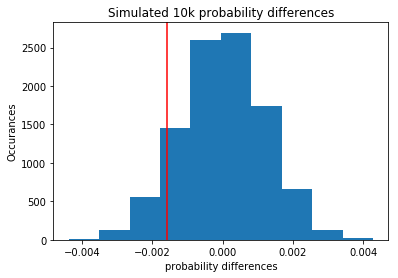

In [26]:
actual_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
plt.hist(p_diffs)
plt.xlabel('probability differences')
plt.ylabel('Occurances')
plt.title('Simulated 10k probability differences')
plt.axvline(actual_diff, color = 'red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
actual_diff

-0.0015782389853555567

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [28]:
(p_diffs > actual_diff).mean()

0.90490000000000004

**Answer**<br>
We have calculated above the p-value, wich is the probability of observing our statistic if the null hypothesis is true.
In our case the p-value is large 0.90, so we fail to reject the null hypothesis and we shold keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
from scipy.stats import norm

z_stat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
print ('The p value is %s' % p_value)
print ('The Z score is %s' % z_stat)

alpha = 0.05
tests_no = 2
critical_value = norm.ppf(1-(alpha/tests_no))
print('The critical value is %s' % critical_value)

The p value is 0.094941687241
The Z score is 1.31092419842
The critical value is 1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**<br>
Using the builtin function we got the same p-value as manually the conclusion based on the p-value remanins the same.
The z-score qe got is outside the 95% confidence level we assumed by defining $\alpha = 0.05$. Because z-score is 1.31 and is less than 1.95 we fail to reject the null hypotesis.
The new page is not statistically better than the old page, we draw the same cpnclusion as in parts **j.** and **k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**<br>
Because we have only two classes we can use Logistic Regression for this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df3 = df2.copy()
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [32]:
df3['intercept'] = 1
df3[['ab_page_neg', 'ab_page']] = pd.get_dummies(df3['group'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page_neg,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        01:36:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**<br>
The p-value associated with the **ab_page** is 0.19 and is different than the other calculated in Part II. The Logistic Regression uses another hypothesis due to the intercept we inserted. 

Null Hypothesis: $p_{new} - p_{old} = 0$<br>
Alternative Hypothesis: $p_{new} - p_{old} \neq 0$

Here the p-value is still larger than $\alpha$ so we still fail to reject the null hypothesis.
The z-score is similar so we can draw the same conclusion

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**<br>
It can be a good ideea to add more dimmensions to the model, maybe there are some other factors that influence the convertions.
Factors like time of day, location or other can influence the convertion rates.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
countries_list = np.sort(countries_df.country.unique())
countries_list

array(['CA', 'UK', 'US'], dtype=object)

In [37]:
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
df4 = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df4.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page_neg,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [39]:
df4[countries_list] = pd.get_dummies(df4['country'])
df4['day_of_week'] = pd.to_datetime(df4['timestamp']).dt.dayofweek 
df4.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page_neg,ab_page,CA,UK,US,day_of_week
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,5
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,6
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0


In [40]:
# rerun model with new params
results_coef = {}
results_p = {}
results_z = {}
scenarios = {
    'ab': ['intercept', 'ab_page'],
    'ab_us_uk': ['intercept', 'ab_page', 'US', 'UK'],
    'us_uk': ['intercept', 'US', 'UK'],
    'ab_us_uk_ca': ['intercept', 'ab_page', 'US', 'UK', 'CA'],
    'ab_days': ['intercept', 'ab_page', 'day_of_week'],
    'days': ['intercept', 'day_of_week'],
}
for key,scenario in scenarios.items():
    model_c = sm.Logit(df4['converted'],df4[scenario])
    results_c = model_c.fit(disp=0)
    results_coef[key] = np.exp(results_c.params)
    results_p[key] = results_c.pvalues
    results_z[key] = results_c.tvalues


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
from IPython.display import display
print('Coeficients')
display(pd.DataFrame(results_coef))
print('P-values')
display(pd.DataFrame(results_p))
print('Z-scores')
display(pd.DataFrame(results_z))

Coeficients


,ab,ab_us_uk,us_uk,ab_us_uk_ca,ab_days,days
CA,NaN,NaN,NaN,0.588396,NaN,NaN
UK,NaN,1.051944,1.052027,0.618960,NaN,NaN
US,NaN,1.041599,1.041647,0.612873,NaN,NaN
ab_page,0.985123,0.985168,NaN,0.985168,0.985129,NaN
day_of_week,NaN,NaN,NaN,NaN,0.996920,0.996918
intercept,0.136863,0.131332,0.130350,0.223203,0.138086,0.137059


P-values


,ab,ab_us_uk,us_uk,ab_us_uk_ca,ab_days,days
CA,NaN,NaN,NaN,0.999999,NaN,NaN
UK,NaN,0.074500,0.074047,0.999999,NaN,NaN
US,NaN,0.129501,0.129068,0.999999,NaN,NaN
ab_page,0.189886,0.191245,NaN,0.191245,0.190064,NaN
day_of_week,NaN,NaN,NaN,NaN,0.274745,0.274468
intercept,0.000000,0.000000,0.000000,0.999996,0.000000,0.000000


Z-scores


,ab,ab_us_uk,us_uk,ab_us_uk_ca,ab_days,days
CA,NaN,NaN,NaN,-0.000002,NaN,NaN
UK,NaN,1.783532,1.786323,-0.000001,NaN,NaN
US,NaN,1.516071,1.517787,-0.000001,NaN,NaN
ab_page,-1.310916,-1.306905,NaN,-1.306905,-1.310389,NaN
day_of_week,NaN,NaN,NaN,NaN,-1.092200,-1.092831
intercept,-246.669004,-76.248769,-78.363903,-0.000005,-172.845975,-199.805292


**Answer**<br>
I tested few scenarios using different combinations of the countries as factors, or the day of the week, but none of the tests have p values or z-scores that could make them statistically significant.
Logistic regression using multiple factors can be affected by outliers, collinearity, correlation of error terms, or non-libearity.

## Conclusions

This project was intended to solve a problem for a e-commerce company. They implemented a new page and gathered data about the conversions on the old and new pages in order to decide if the new format increases the convertion rate.

In the first part we looked at the data and did a small cleanup.

In the second part we formulated a null hypothesis in wich we staded that the old page brings at least or more conversions on the site. The analysis resulted in a p-value of 0.90 and using this we could not reject the null hypotesis. We trid to calculate the z-value for the A/B test and this also failed to reject the null hypotesis.

In the third part we tried logistic regression to calculate the same statistics and it resulted in the same conclusions.<br>
Furthermore we added another factors to the regression model, like: country or day of the week. This might have gave us some insight about factors that significantly affect the conversion rate, but it turns out they don't.

We can conclude the analysis by keeping the old page, because there is no statistical reasons to launch the new page since it doesn't bring any benefits in ctr.


In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0